In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("C:/Users/YASHASVI/Desktop/data science/archive/Fraud.csv")
df.head()

In [ ]:
df.info()

In [ ]:
#checking any null values
df.isnull().sum()

In [ ]:
type = df['type'].unique()

In [ ]:
type

In [ ]:
# index according to their values high to low
type = df['type'].value_counts()
transaction = type.index
transaction
type

In [ ]:
#how much each transaction has been done 
quantity = type.values
quantity

In [ ]:
plt.pie(quantity, labels=transaction,explode = [0, 0.1, 0.11, 0.15, 0.2], colors = [ 'red', 'green', 'cyan','yellow', 'violet'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Transaction Types')
plt.show()

# since their are some NAN values in TYPE feature so we need to replace it



In [ ]:
#now we are doing preprocessing the data and replace some values in data set here we assigning them their index according to their values
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,3,5],inplace=True)

In [ ]:
df

In [59]:
#df["isFraud"] = np.where(df['isFraud']== 0, 'No Fraud', 'Fraud')


In [60]:
#target and cleaned data set
target = df.iloc[:,-2]
df = df.drop('isFlaggedFraud', axis = 1)
df = df.drop('isFraud', axis = 1)
df = df.drop('step', axis = 1)
df = df.drop('nameOrig', axis = 1)
df = df.drop('nameDest', axis = 1)

In [61]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,2,9839.64,170136.0,160296.36,0.0,0.0
1,2,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,2,11668.14,41554.0,29885.86,0.0,0.0


# MODEL TRAINING AND FEATURE SCALING

In [62]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [63]:
# Testing the dataset and do prediction for one entry
model.predict([X_test_scaled[9872]])   #any random input from testing data 
 

array([0], dtype=int64)

In [64]:
# Make one prediction any random value just checking model is working properly or not
model.predict([[45,98349.64,1736.0,1096.36,0.0,0.0]])


array([1], dtype=int64)

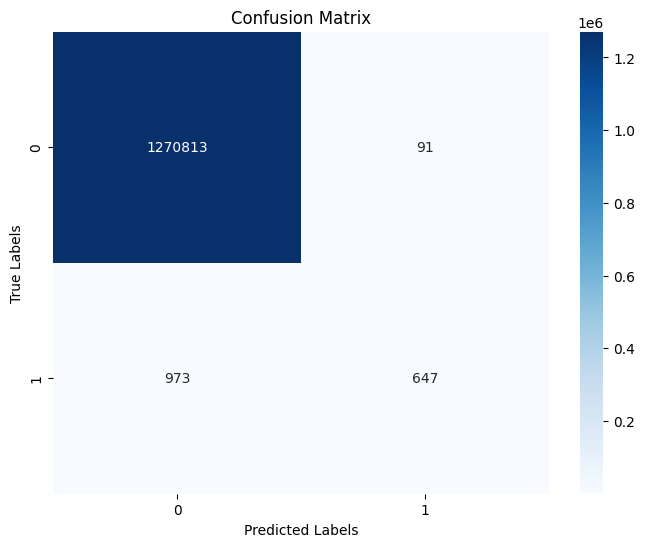

Confusion Matrix:
 [[1270813      91]
 [    973     647]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.88      0.40      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.94      0.70      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



In [65]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [66]:
model.score(X_test, y_test)

C:\Users\YASHASVI\Desktop\data science\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.8300307106192103

In [67]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error: 0.0008361335424714976
R-squared: 0.34237267719534337


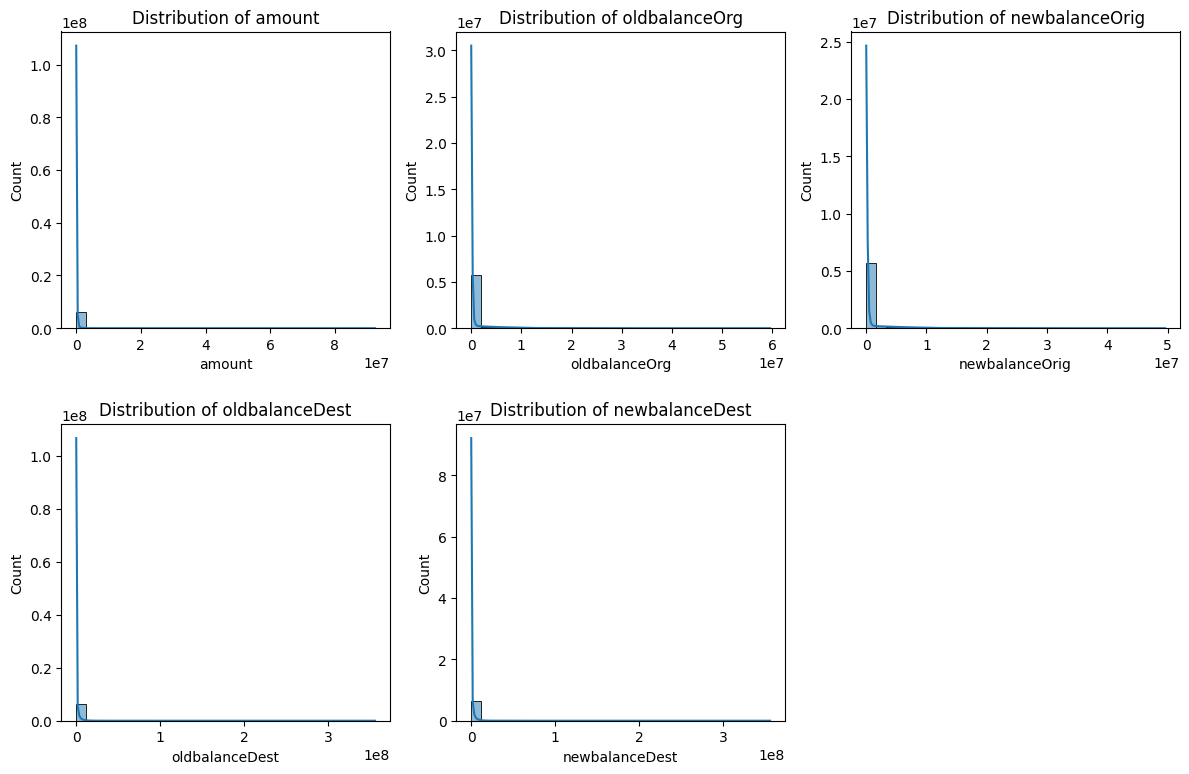

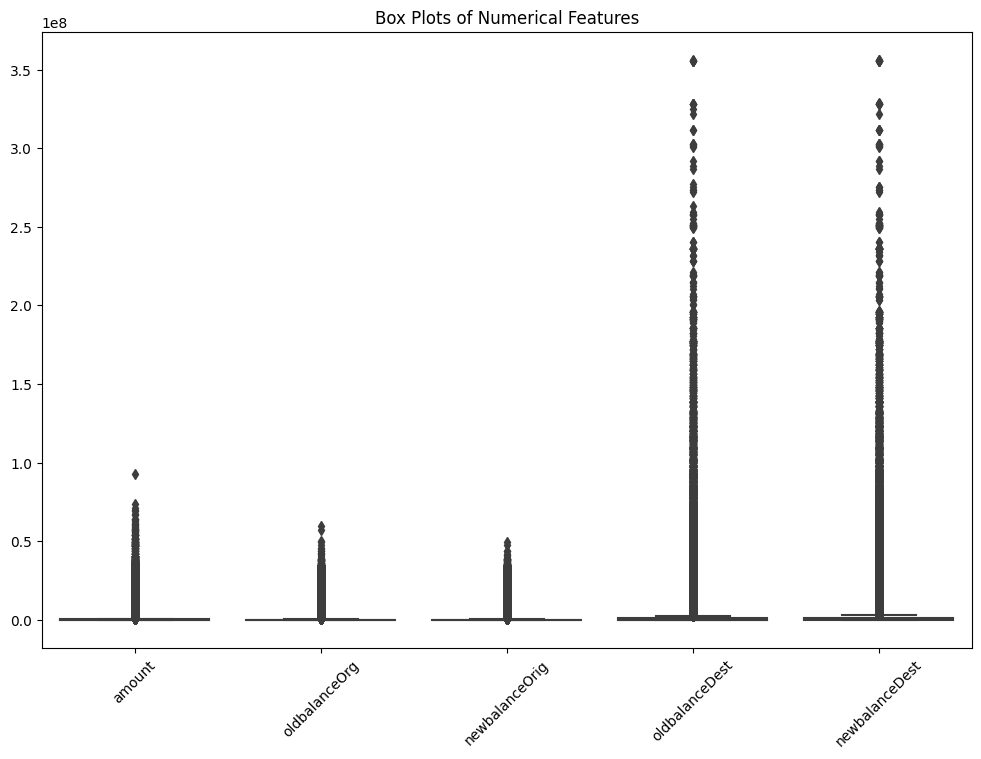

In [68]:
# Visualize distributions of numerical features using histograms
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(2, 3, numerical_features.index(feature) + 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


In [69]:
X_train_scaled, y_train

(array([[ 1.61202284,  0.34345292,  1.32880177,  1.43753635, -0.17499203,
         -0.30114711],
        [ 1.61202284,  0.05435533, -0.20740058, -0.13941899, -0.0865455 ,
         -0.17188343],
        [-0.30851658, -0.26560052, -0.28741626, -0.29239541, -0.32418077,
         -0.33378152],
        ...,
        [-0.94869638, -0.28120584, -0.26814157, -0.27573241, -0.22902672,
         -0.2428652 ],
        [-0.94869638, -0.17741639, -0.28164719, -0.29239541, -0.24867679,
         -0.24401339],
        [-0.94869638, -0.14969432, -0.22075864, -0.2559994 , -0.32418077,
         -0.30931625]]),
 6271196    0
 1888243    0
 5549957    0
 2025342    0
 682342     0
           ..
 1570006    0
 2234489    0
 4926484    0
 4304572    0
 1692743    0
 Name: isFraud, Length: 5090096, dtype: int64)